# Problem Statement 3.1

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

* Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
* Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
    (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)


In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
gold = pd.read_csv('D:/DS/aspiration.ai/GOLD.csv')

In [3]:
pandas_profiling.ProfileReport(gold)

Number of variables,9
Number of observations,512
Total Missing (%),2.2%
Total size in memory,36.1 KiB
Average record size in memory,72.2 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [4]:
gold.shape

(512, 9)

In [5]:
gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [6]:
gold.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
447,"Jan 31, 2019",33100,32937,33245,32903,10.39K,0.60%,NaN,507.047655
224,"Mar 20, 2018",30284,30393,30393,30220,9.13K,-0.49%,474.0,64.366380
486,"Mar 27, 2019",32019,32101,32182,32000,17.72K,-0.29%,NaN,100.108062
395,"Nov 19, 2018",30888,31068,31068,30785,8.15K,-0.42%,772.0,103.946857
346,"Sep 10, 2018",30725,30549,30748,30526,11.42K,0.71%,245.0,399.447225


In [7]:
print(gold.Pred.isnull().any())

True


In [8]:
print(gold.new.isnull().any())

False


* Pred column has some null values.
* new column doesnt have any null values.

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


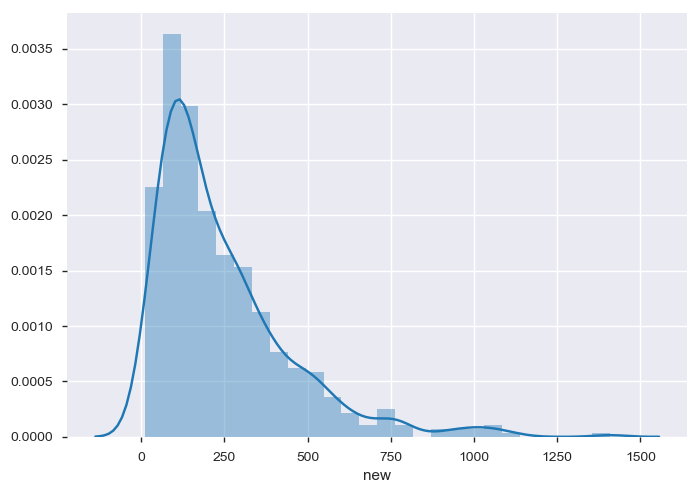

In [9]:
sns.distplot(gold.new)

In [10]:
lm_Pred = smf.ols(formula = 'Pred ~  Open + High + Low + Price', data = gold).fit()
lm_new = smf.ols(formula = 'new ~ Open + High + Low + Price', data = gold).fit()

In [11]:
lm_Pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.099e+28
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:                 9566.7
No. Observations:                 411   AIC:                        -1.912e+04
Df Residuals:                     406   BIC:                        -1.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.774e-11   2.81e-11      1.342      0.180   -1.75e-11     9.3e-11
Open           3.0000    1.3e-14   2.31e+14      0.000       3.000       3.000
High          -1.0000   1.52e-14  -6.56e+13      0.000      -1.000      -1.000
Low           -4.0000   1.55e-14  -2.58e+14      0.000      -4.000      -4.000
Price          2.0000   1.53e-14   1.31e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                        4.482   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.106   Jarque-Bera (JB):               50.534
Skew:                          -0.255   Prob(JB):                     1.06e-11
Kurtosis:                       1.360   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.118e+07
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:                -538.12
No. Observations:                 512   AIC:                             1086.
Df Residuals:                     507   BIC:                             1107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3282      0.738      0.445      0.657      -1.122       1.778
Open          -1.0004      0.000  -2593.068      0.000      -1.001      -1.000
High           1.0050      0.000   2286.401      0.000       1.004       1.006
Low           -1.0177      0.000  -2233.145      0.000      -1.019      -1.017
Price          1.0129      0.000   2210.033      0.000       1.012       1.014
==============================================================================
Omnibus:                      543.754   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76044.049
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      62.057   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# values filled from the OLS regression results
gold['new_fill'] = gold.Open*(-1.0004) + gold.High*(1.005) + gold.Low*(-1.0177) + gold.Price*(1.0129)

In [17]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_fill
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,113.9815
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,291.2397
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,127.4352
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,97.0030
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,107.5326


In [18]:
gold.new_fill.isnull().any()

False

In [19]:
np.corrcoef(gold.new, gold.new_fill)

array([[1.        , 0.99999397],
       [0.99999397, 1.        ]])

Therefore, 'new' is the column which has a linear relationship with the OHLC values.

'Pred' is the column which has polynomial relationship with OHLC values.

In [20]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_fill
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,113.9815
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,291.2397
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,127.4352
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,97.0030
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,107.5326


In [30]:
linreg = LinearRegression()
X = pd.DataFrame(gold.Price)
X = X.join(gold.Open)
X = X.join(gold.High)
X = X.join(gold.Low)

In [32]:
X.head(1)

,Price,Open,High,Low
0,28060,28400,28482,28025


In [33]:
X.shape

(512, 4)

In [34]:
y = pd.DataFrame(gold.Pred)

In [35]:
y.shape

(512, 1)

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

In [37]:
from sklearn.preprocessing import PolynomialFeatures